In [26]:
# required imports
import sklearn.datasets as skDatasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# loading sklearn breast cancer dataset
bcData = skDatasets.load_breast_cancer()

In [28]:
# we can view the size of the sample and target data by viewing those Numpy array's shape
print(bcData.data.shape)
print(bcData.target.shape)

# the following lines show the same thing, just with more context
print('Sample data contains {} samples with {} attributes each'.format(bcData.data.shape[0],bcData.data.shape[1]))
print('Target data size {}'.format(bcData.target.shape[0]))

(569, 30)
(569,)
Sample data contains 569 samples with 30 attributes each
Target data size 569


In [29]:
# we now split the data into a training set and a testing set using sklearn's train_test_split function
x_train,x_test,y_train,y_test = train_test_split(bcData.data,bcData.target,random_state = 42)

In [30]:
# we can view the sizes of the training and testing dataset by using the each arrays' shape property (they are Numpy arrays)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# This will show us the same information, but with more context
print('The training dataset contains {} samples'.format(x_train.shape[0]))
print('The testing dataset contains {} samples'.format(x_test.shape[0]))

(426, 30)
(143, 30)
(426,)
(143,)
The training dataset contains 426 samples
The testing dataset contains 143 samples


In [31]:
# we now load the model (GussianNB)
gnb = GaussianNB()

In [32]:
# we can now fit (train) the model using the training dataset
gnb.fit(x_train,y_train)

GaussianNB()

In [33]:
# After training the model, we then have it perform on the test dataset
bcPredict = gnb.predict(x_test)

In [34]:
# we use the .score() method to view the accuracy of the model
gnb.score(x_test,y_test)

0.958041958041958

In [35]:
# we can generate and display a confusion matrix using the sklearn function confusion_matrix
confMat = confusion_matrix(y_true = y_test, y_pred = bcPredict)
confMat

array([[51,  3],
       [ 3, 86]])

In [36]:
# we now make a classification report
names = [str(name) for name in bcData.target_names]

print(classification_report(y_test,bcPredict,target_names=names))

              precision    recall  f1-score   support

   malignant       0.94      0.94      0.94        54
      benign       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



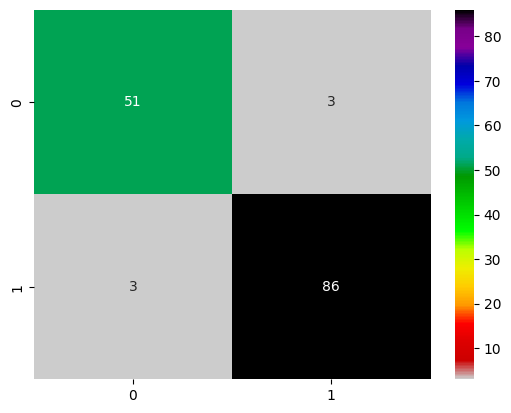

In [37]:
# now we can view the confusion matrix with a seaborn heatmap
confusion_df = pd.DataFrame(confMat,index = range(2),columns=range(2))
axes = sns.heatmap(confusion_df,annot=True,cmap='nipy_spectral_r')

In [45]:
# using cross_validation_score and showing the avg. score and std.dev.
kfold = KFold(n_splits=10,random_state=42,shuffle=True)

scores = cross_val_score(estimator=gnb,X=bcData.data,y=bcData.target)

print(f'Mean accuracy: {scores.mean():.2%}')
print(f'Accuracy standard deviation: {scores.std():.2%}')

Mean accuracy: 93.85%
Accuracy standard deviation: 1.46%


In [39]:
# we will run multiple models to find the best one
# first, create some support code
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

estimators = {
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'SVC' : SVC(gamma='scale'),
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=10000)

}
# note: was requested to use multi_class='ovr' as a parameter, but this parameter is deprecated

In [40]:
# run each of the models on the data
for est_name,est_obj in estimators.items():
  kfold = KFold(n_splits=10,random_state=42,shuffle=True)
  scores = cross_val_score(estimator=est_obj,X=bcData.data,y=bcData.target,cv=kfold)
  print(f'{est_name:>20}: ' + f'mean accuracy={scores.mean():.2%};'+f'standard deviation={scores.std():2%}')


KNeighborsClassifier: mean accuracy=93.67%;standard deviation=3.549094%
                 SVC: mean accuracy=91.73%;standard deviation=4.392594%
  LogisticRegression: mean accuracy=94.90%;standard deviation=2.676929%
